### Data Drift: Detection Using Statistical Tests
**Question**: Simulate two datasets with a shift in distribution, and apply the Kolmogorov-
Smirnov test to determine if data drift has occurred.

✅ Data simulated successfully.


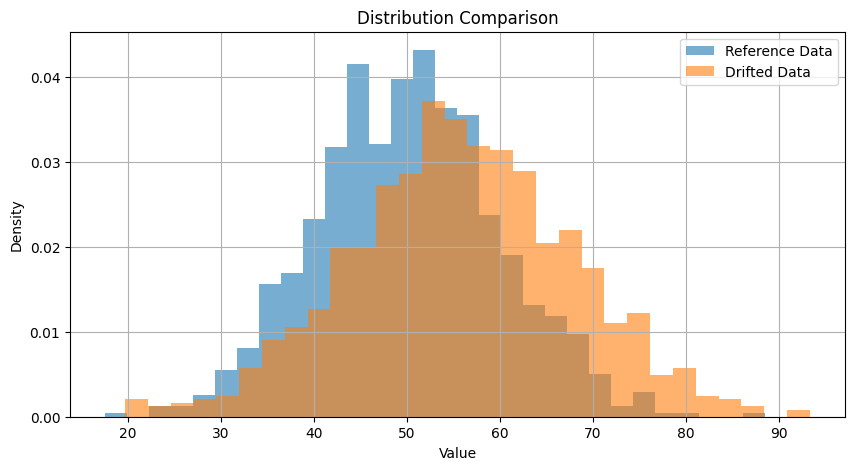


Kolmogorov-Smirnov Test Results
KS Statistic: 0.2310
P-Value: 0.0000
❌ Data drift detected (p-value < 0.05)
✅ Unit Test Passed: Identical datasets detected as similar.


In [1]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# -------------------------
# Utility Functions
# -------------------------

def validate_input_data(data, name="data"):
    assert isinstance(data, (list, np.ndarray, pd.Series)), f"{name} must be list, numpy array, or pandas Series"
    data = np.asarray(data)
    assert data.size > 0, f"{name} is empty"
    assert np.issubdtype(data.dtype, np.number), f"{name} must contain numeric values only"
    return data

def perform_ks_test(data1, data2):
    try:
        data1 = validate_input_data(data1, "Reference Data")
        data2 = validate_input_data(data2, "Drifted Data")
        stat, p_value = ks_2samp(data1, data2)
        return stat, p_value
    except AssertionError as e:
        print(f"❌ Input Validation Error: {e}")
        return None, None
    except Exception as e:
        print(f"❌ Unexpected Error during KS Test: {e}")
        return None, None

# -------------------------
# Simulate Datasets
# -------------------------
np.random.seed(42)

try:
    reference_data = np.random.normal(loc=50, scale=10, size=1000)
    drifted_data = np.random.normal(loc=55, scale=12, size=1000)
    print("✅ Data simulated successfully.")
except Exception as e:
    print(f"❌ Error simulating data: {e}")
    reference_data, drifted_data = [], []

# -------------------------
# Visualize
# -------------------------
try:
    plt.figure(figsize=(10, 5))
    plt.hist(reference_data, bins=30, alpha=0.6, label='Reference Data', density=True)
    plt.hist(drifted_data, bins=30, alpha=0.6, label='Drifted Data', density=True)
    plt.title('Distribution Comparison')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"❌ Error in visualization: {e}")

# -------------------------
# Apply KS Test
# -------------------------
ks_stat, p_val = perform_ks_test(reference_data, drifted_data)

# -------------------------
# Interpret Results
# -------------------------
if ks_stat is not None:
    print(f"\nKolmogorov-Smirnov Test Results")
    print(f"KS Statistic: {ks_stat:.4f}")
    print(f"P-Value: {p_val:.4f}")

    if p_val < 0.05:
        print("❌ Data drift detected (p-value < 0.05)")
    else:
        print("✅ No significant data drift detected (p-value >= 0.05)")

# -------------------------
# Unit Test (Basic)
# -------------------------
def test_ks_on_identical_data():
    sample = np.random.normal(0, 1, 500)
    stat, p = perform_ks_test(sample, sample)
    assert p > 0.95, "Test failed: identical distributions should have high p-value"
    print("✅ Unit Test Passed: Identical datasets detected as similar.")

test_ks_on_identical_data()